<a href="https://colab.research.google.com/github/susan561234/deep-learning-hw/blob/main/IMDB_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import GRU,Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
max_words = 500
batch_sizes = 128

# 載入 IMDB 數據集
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

# 將每個評論截取或填充至 500 個詞
train_data_new = sequence.pad_sequences(train_data, maxlen=max_words)
test_data_new = sequence.pad_sequences(test_data, maxlen=max_words)

# 將數據集拆分為訓練集和驗證集
x_train, x_val, y_train, y_val = train_test_split(train_data_new, train_label, test_size=0.2, random_state=42)

# 創建訓練集、驗證集和測試集的 tf.data.Dataset 對象
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db_train = db_train.shuffle(1000).batch(batch_sizes, drop_remainder=True)
db_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
db_val = db_val.batch(batch_sizes, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((test_data_new, test_label))
db_test = db_test.batch(batch_sizes, drop_remainder=True)



17464789/17464789 [==============================] - 0s 0us/step


In [4]:
print(db_train)
print(db_test)

<_BatchDataset element_spec=(TensorSpec(shape=(128, 500), dtype=tf.int32, name=None), TensorSpec(shape=(128,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(128, 500), dtype=tf.int32, name=None), TensorSpec(shape=(128,), dtype=tf.int64, name=None))>


In [5]:
vocab_size = 10000
model = tf.keras.models.Sequential()
model.add(layers.Embedding(
    vocab_size,
    output_dim=128,
    input_length=max_words
))
model.add(GRU(128,dropout=0.2,return_sequences=True,recurrent_dropout=0.2))#recurrent_dropout return_sequences=True
model.add(GRU(64))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 500, 128)          99072     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,416,385
Trainable params: 1,416,385
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# 訓練模型
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(db_train, epochs=10, validation_data=db_val)

# 評估模型性能
loss, accuracy = model.evaluate(db_test)
print("Test Loss: {:.4f}, Test Accuracy: {:.2f}%".format(loss, accuracy * 100))

# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
# history = model.fit(db_train,batch_size=batch_sizes,epochs=10,verbose=2)

Epoch 1/10
156/156 [==============================] - 705s 4s/step - loss: 0.0395 - accuracy: 0.9868 - val_loss: 0.6161 - val_accuracy: 0.8736
Epoch 2/10
156/156 [==============================] - 686s 4s/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.7137 - val_accuracy: 0.8738
Epoch 3/10
156/156 [==============================] - 682s 4s/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.8531 - val_accuracy: 0.8678
Epoch 4/10
156/156 [==============================] - 676s 4s/step - loss: 0.0393 - accuracy: 0.9858 - val_loss: 0.5687 - val_accuracy: 0.8668
Epoch 5/10
156/156 [==============================] - 682s 4s/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.6951 - val_accuracy: 0.8692
Epoch 6/10
156/156 [==============================] - 673s 4s/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.7965 - val_accuracy: 0.8686
Epoch 7/10
156/156 [==============================] - 694s 4s/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.8302 - val_accuracy: 0.8720

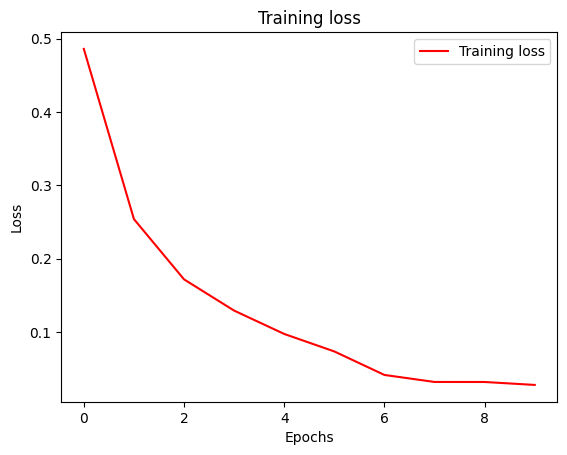

In [7]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.plot(epochs,loss,"r-",label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(db_test,batch_size=batch_sizes)
print("Test Loss: {:.4f}, Test Accuracy: {:.2f}%".format(test_loss, test_acc * 100))

195/195 [==============================] - 177s 903ms/step - loss: 0.7494 - accuracy: 0.8482
Test Loss: 0.7494, Test Accuracy: 84.82%
